# Analyzing the tweets📊

### import necessary library which contain 
- Json
- pandas
- matplotlib

In [338]:
%matplotlib inline
import re
import json
import pandas as pd
import matplotlib.pyplot as plt

In [339]:
tweets_data_path = 'worldcup2018_twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

## Show the total captured tweet data 

In [340]:
print(len(tweets_data))

6008


In [341]:
tweets = pd.DataFrame()

In [342]:
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))

tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))

tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))



In [343]:
tweets_by_lang = tweets['lang'].value_counts()

In [344]:
tweets_by_lang.head()

en    3894
pt     402
es     335
fr     270
ja     221
Name: lang, dtype: int64

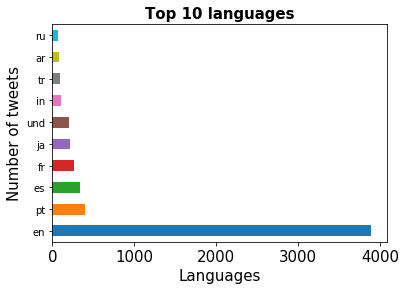

In [345]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 languages', fontsize=15, fontweight='bold')
tw_lang.plot(ax=ax, kind='barh') 

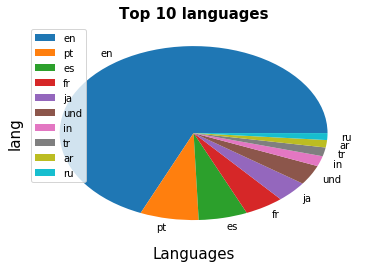

In [346]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:10].plot(ax=ax, kind='pie',legend=True)

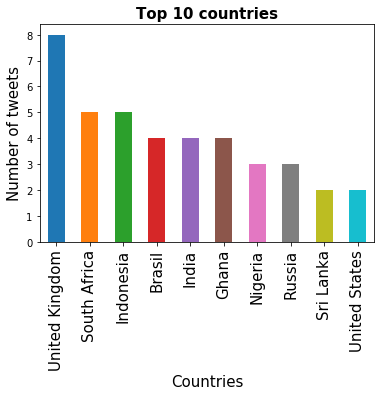

In [347]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 countries', fontsize=15, fontweight='bold')
tweets_by_country[:10].plot(ax=ax, kind='bar')

# Text Mining

In [348]:
import re 

In [349]:
def word_in_text(word,text):
    word = word.lower()
    text = text.lower()
    match = re.search(word,text)
    if match :
        return True
    return False

In [350]:
tweets['Cristiano Ronaldo'] =list(tweets['text'].apply(lambda tweet: word_in_text('Cristiano Ronaldo', tweet)))
tweets['Luis Suarez'] =list(tweets['text'].apply(lambda tweet: word_in_text('Luis Suarez', tweet)))
tweets['Neymar'] =list(tweets['text'].apply(lambda tweet: word_in_text('Neymar', tweet)))
tweets['Lionel Messi'] =list(tweets['text'].apply(lambda tweet: word_in_text('Lionel Messi', tweet)))
tweets['WorldCup'] =list(tweets['text'].apply(lambda tweet: word_in_text('Lionel Messi', tweet)))



In [351]:
print(tweets['Cristiano Ronaldo'].value_counts())
print(tweets['Luis Suarez'].value_counts())
print(tweets['Neymar'].value_counts())
print(tweets['Lionel Messi'].value_counts())

False    5756
True      252
Name: Cristiano Ronaldo, dtype: int64
False    6000
True        8
Name: Luis Suarez, dtype: int64
False    5634
True      374
Name: Neymar, dtype: int64
False    5340
True      668
Name: Lionel Messi, dtype: int64


In [352]:
CR = tweets['Cristiano Ronaldo'].value_counts()[True]
LS = tweets['Luis Suarez'].value_counts()[True]
NM = tweets['Neymar'].value_counts()[True]
LM = tweets['Lionel Messi'].value_counts()[True]

In [353]:
print("total tweets of Cristiano Ronaldo are \n",CR,"tweets") #print total count of Cristiano Ronaldo
print("total tweets of Luis Suarezare \n",LS,"tweets"),#print total count of Luis Suarez
print(NM)#print total count of Neymar
print(LM)#print total count of Lionel Messi


total tweets of Cristiano Ronaldo are 
 252 tweets
total tweets of Luis Suarezare 
 8 tweets
374
668


## Ranking


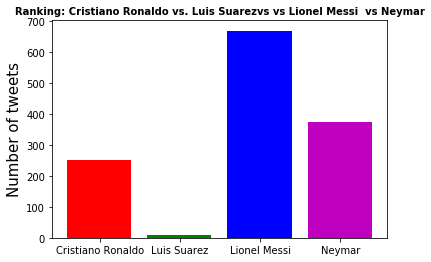

In [354]:
Fb_playerFb_player = ['Cristiano Ronaldo', 'Luis Suarez', 'Lionel Messi','Neymar']
tweets_by_Fb_player = [CR,LS,LM,NM]
x_pos = list(range(len(Fb_player)))
width = 0.8
fig, ax = plt.subplots()
#ploting graph of tweets_by_Fb_player
pack_color = 'rgbm'
plt.bar(x_pos, tweets_by_Fb_player, width, alpha=1,color=pack_color)
# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: Cristiano Ronaldo vs. Luis Suarezvs vs Lionel Messi  vs Neymar', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.01 * width for p in x_pos])
ax.set_xticklabels(Fb_player)
plt.show()


# Specifying Relevant Tweet text

In [355]:
tweets['FIFA2018'] =list(tweets['text'].apply(lambda tweet: word_in_text('FIFA2018', tweet)))
tweets['World Cup'] =list(tweets['text'].apply(lambda tweet: word_in_text('World Cup', tweet)))


In [356]:
tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('FIFA2018', tweet) or 
                                          word_in_text('World Cup', tweet))                            

In [357]:
print(tweets['relevant'].value_counts())
print(tweets['FIFA2018'].value_counts())
print(tweets['World Cup'].value_counts())

False    5692
True      316
Name: relevant, dtype: int64
False    6005
True        3
Name: FIFA2018, dtype: int64
False    5695
True      313
Name: World Cup, dtype: int64


In [358]:
print(tweets[tweets['relevant'] == True]['Cristiano Ronaldo'].value_counts())
print(tweets[tweets['relevant'] == True]['Luis Suarez'].value_counts())
print(tweets[tweets['relevant'] == True]['Neymar'].value_counts())
print(tweets[tweets['relevant'] == True]['Lionel Messi'].value_counts())

False    305
True      11
Name: Cristiano Ronaldo, dtype: int64
False    314
True       2
Name: Luis Suarez, dtype: int64
False    311
True       5
Name: Neymar, dtype: int64
False    244
True      72
Name: Lionel Messi, dtype: int64


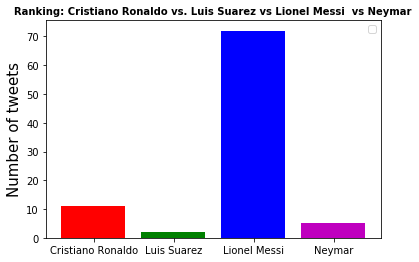

In [359]:
R_tweets_by_Fb_player = [tweets[tweets['relevant'] == True]['Cristiano Ronaldo'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['Luis Suarez'].value_counts()[True], 
                       tweets[tweets['relevant'] == True]['Lionel Messi'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['Neymar'].value_counts()[True],
                     ]
x_pos = list(range(len(R_tweets_by_Fb_player)))
width = 0.8
fig, ax = plt.subplots()
plt.legend(R_tweets_by_Fb_player)
plt.bar(x_pos, R_tweets_by_Fb_player, width,alpha=1,color=pack_color)
# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: Cristiano Ronaldo vs. Luis Suarez vs Lionel Messi  vs Neymar', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.01 * width for p in x_pos])
ax.set_xticklabels(Fb_player)
plt.show()

# Extracting links from the relevants tweets


In [360]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

In [361]:
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))


Next we will create a new DataFrame called tweets_relevant_with_link. This DataFrame is a subset of tweets DataFrame and contains all relevant tweets that have a link.

In [362]:
tweets_relevant = tweets[tweets['relevant'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

In [371]:
print("---------Link of Cristiano Ronaldo---------")
print(tweets_relevant_with_link[tweets_relevant_with_link['Cristiano Ronaldo'] == True]['link'], "\n")
print("---------Link of Luis Suarez---------")
print(tweets_relevant_with_link[tweets_relevant_with_link['Luis Suarez'] == True]['link'], "\n")
print("---------Lionel Messi---------")
print(tweets_relevant_with_link[tweets_relevant_with_link['Lionel Messi'] == True]['link'], "\n")
print("---------Link of Neymar---------")
print(tweets_relevant_with_link[tweets_relevant_with_link['Neymar'] == True]['link'] + "\n", "\n")

---------Link of Cristiano Ronaldo---------
373     https://t.co/xYNBU3idcK
1352    https://t.co/eYWpsJ7XLn
4905    https://t.co/pIqKs66R4H
4915    https://t.co/1flncGqa2l
5710    https://t.co/zGbL1BtDiK
Name: link, dtype: object 

---------Link of Luis Suarez---------
1573    https://t.co/g7xaLpMJZL
5965          https://t.co/8rA…
Name: link, dtype: object 

---------Lionel Messi---------
373     https://t.co/xYNBU3idcK
375     https://t.co/XncHQxy9u3
448     https://t.co/jEWLT0qasF
509     https://t.co/WGWOJvpVX3
776     https://t.co/JHpoMbdSV4
1080    https://t.co/LqI9wCxuha
1313                https://t.…
1428        https://t.co/WfiyW…
1581        https://t.co/HfG9G…
1658    https://t.co/wtMkMSeDrz
1681    https://t.co/qnxlZ9ndY3
1984    https://t.co/zo9LJWVlOA
2224    https://t.co/pARNK1dJje
2298    https://t.co/NsefOoLFAT
2304    https://t.co/XncHQxy9u3
2337    https://t.co/zo9LJWVlOA
2344    https://t.co/7445uioON9
2732    https://t.co/1EEWindnyk
2813    https://t.co/NKfIikecJR